In [15]:
import cv2
from bovw import BOVW
import pandas
from typing import *
from PIL import Image
import matplotlib.pyplot as plt 
from main import Dataset, run_final_pipeline, run_BOVW_experiment
from IPython.display import clear_output

Loading the data

In [2]:
print("Loading Train Dataset...")
data_train = Dataset(ImageFolder="../places_reduced/train")

print("Loading Test Dataset...")
data_test = Dataset(ImageFolder="../places_reduced/val")

Loading Train Dataset...
Loading Test Dataset...


Camell


#### Run the entire suit of tests and save them to final_experiment_results.csv

In [ ]:
# run_final_pipeline(data_train, data_test) # Uncomment for delivery

#### Loading the results csv from previous executions

In [93]:
results = pandas.read_csv("final_experiment_results.csv")

#### Results of the first experiment

In [14]:
print(results[results["Experiment"] == "Classifiers"])

    Experiment Parameter       Value  ... CV_Accuracy    CV_Std  Test_Accuracy
0  Classifiers      Type     log_reg  ...    0.284545  0.022446       0.303182
1  Classifiers      Type  svm_linear  ...    0.271095  0.011908       0.291818
2  Classifiers      Type     svm_rbf  ...    0.301675  0.017618       0.340000
3  Classifiers      Type          rf  ...    0.247870  0.013414       0.272727

[4 rows x 8 columns]


#### Running a given experiment and keeping the labels for qualitative results

In [20]:
classifiers = ["log_reg", "svm_linear", "svm_rbf", "rf"]
experiment_one_acc = {}
experiment_one_data = {}

for clf in classifiers:
    print("Running classifier", clf)
    bovw = BOVW(detector_type="SIFT", codebook_size=128)
    experiment_one_acc[clf], experiment_one_data[clf] = run_BOVW_experiment(bovw,data_train,data_test, clf_name=clf)

clear_output()
print("Experiment 1 succesfull")

Running classifier log_reg
Loading cached descriptors from cache\train_descriptors_SIFT.pkl...


KeyboardInterrupt: 

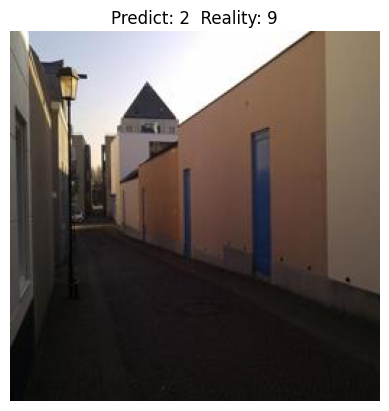

In [ ]:
plt.title(f"Predict: {experiment_one_data[clf][0][0]}  Reality: {experiment_one_data[clf][0][1]}")
plt.imshow(data_test[0][0])
plt.axis("off")  # Hide axes for a cleaner look
plt.show()

Testint different Scaling methods, as well as normalization.

In [34]:
scaling_acc = {}
scaling_data = {}
methods =  ["None", "l2", "hellinger", "l1", "standard", "minmax"]
for method in methods:
        bovw = BOVW(detector_type="SIFT", codebook_size=128, method=method)
        scaling_acc[method], scaling_data[method] = run_BOVW_experiment(bovw,data_train,data_test,)


clear_output()
print("Experiment scaling succesfull")

Experiment scaling succesfull


In [35]:
import numpy as np
correct_guesses = {}
for method in methods:
    correct_guesses[method] =  [gt == pred for gt, pred in zip(scaling_data[method][1], scaling_data[method][0])]

No_Method = np.array(correct_guesses["None"])
S1 = np.array(correct_guesses["l2"])
S2 = np.array(correct_guesses["hellinger"])
S3 = np.array(correct_guesses["l1"])
S4 = np.array(correct_guesses["standard"])
S5 = np.array(correct_guesses["minmax"])

In [ ]:
from jordi_uytils import plot_imgs_at_idx

Lets find an image that we find with no scaling, but cant find with a certain scaling.

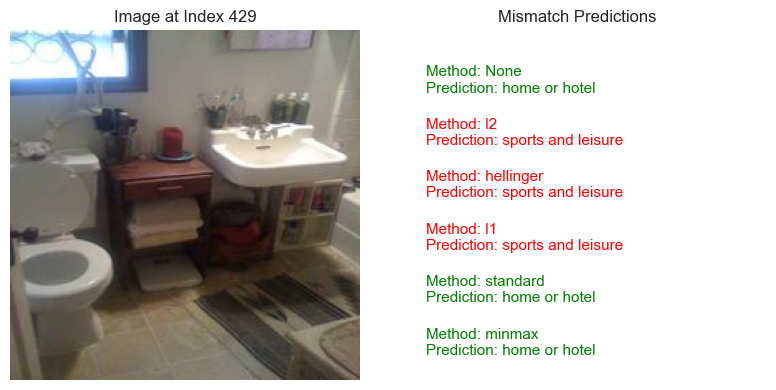

In [75]:
Secondary_All = np.stack([S1, S2, S3, S4, S5])

All_Secondary_Are_True = np.all(Secondary_All, axis=0)

Final_Mask = No_Method & (~All_Secondary_Are_True)
mismatch_indices = np.where(Final_Mask)[0]


plot_imgs_at_idx(mismatch_indices[70],data_test,methods,scaling_data)


Let's find one where we got it right and now we don't

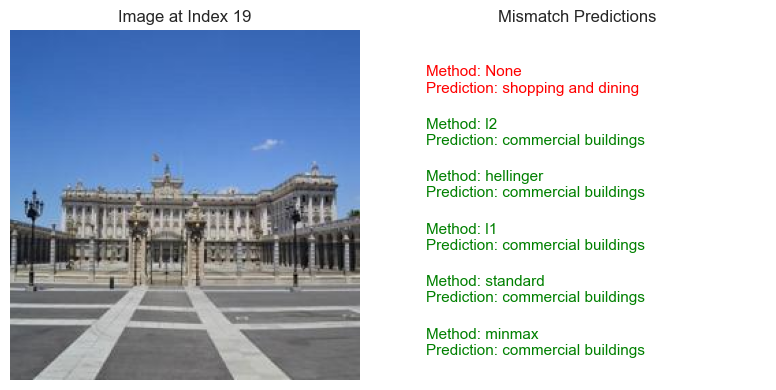

In [64]:
Any_Secondary_Is_True = np.any(Secondary_All, axis=0)

# 2. Check where Primary is False (~P)
Primary_Is_False = ~No_Method

# 3. Combine the conditions: (Primary is False) AND (Any Secondary is True)
Final_Mask = Primary_Is_False & Any_Secondary_Is_True

# 4. Find the indices where the Final_Mask is True
mismatch_indices = np.where(Final_Mask)[0]

plot_imgs_at_idx(mismatch_indices[2],data_test,methods,scaling_data)


Now all true

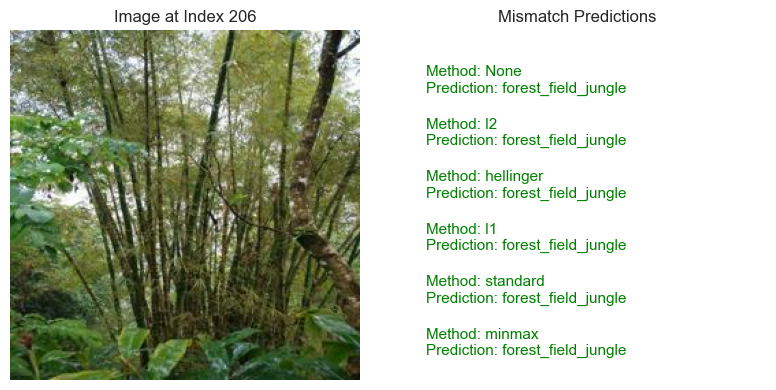

In [71]:
All_Secondary_Are_True = np.all(Secondary_All, axis=0)

# 3. Combine the conditions: (Primary is True) AND (All Secondary are True)
Final_Mask = No_Method & All_Secondary_Are_True

# 4. Find the indices where the Final_Mask is True
mismatch_indices = np.where(Final_Mask)[0]

plot_imgs_at_idx(mismatch_indices[15],data_test,methods,scaling_data)


Now all false

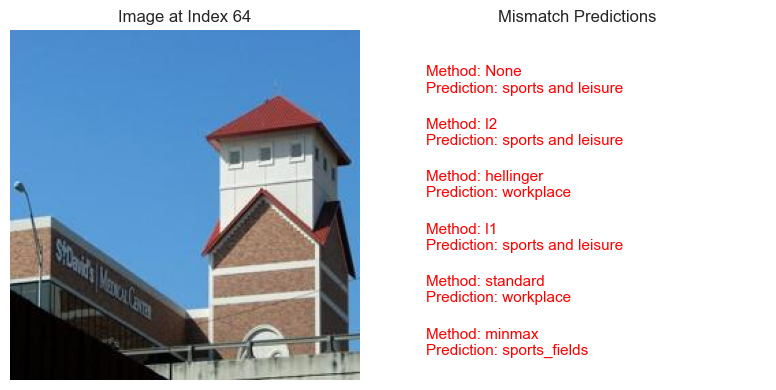

In [70]:
Not_P = ~No_Method
Not_S1 = ~S1
Not_S2 = ~S2
Not_S3 = ~S3
Not_S4 = ~S4
Not_S5 = ~S5

# 2. Combine all six NOT arrays into a single 2D array
All_False_Arrays = np.stack([Not_P, Not_S1, Not_S2, Not_S3, Not_S4, Not_S5])

# 3. Find where ALL of these NOT arrays are TRUE (meaning all original arrays are FALSE)
# This is equivalent to (~P) & (~S1) & (~S2) & (~S3) & (~S4) & (~S5)
Final_Mask = np.all(All_False_Arrays, axis=0)
mismatch_indices = np.where(Final_Mask)[0]
plot_imgs_at_idx(mismatch_indices[25],data_test,methods,scaling_data)


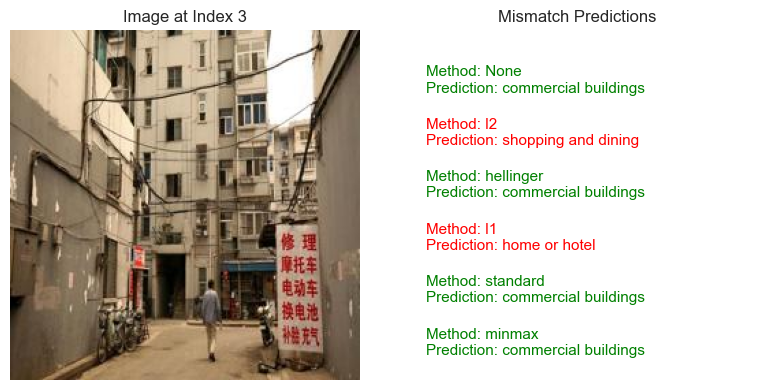

In [ ]:
from jordi_utils import plot_imgs_at_idx

plot_imgs_at_idx(mismatch_indices[0],data_test,methods,scaling_data)

In [46]:
scaling = results[results["Experiment"] == "Scaling"]
scaling

,Experiment,Parameter,Value,Classifier,Train_Accuracy,CV_Accuracy,CV_Std,Test_Accuracy
35,Scaling,Method,NaN,svm_linear,0.360198,0.269022,0.020259,0.300909
36,Scaling,Method,l2,svm_linear,0.359623,0.275002,0.013142,0.312727
37,Scaling,Method,hellinger,svm_linear,0.359738,0.275345,0.019772,0.298636
38,Scaling,Method,l1,svm_linear,0.306162,0.260170,0.018588,0.278636
39,Scaling,Method,standard,svm_linear,0.354334,0.266722,0.023119,0.284091
40,Scaling,Method,minmax,svm_linear,0.355599,0.272701,0.019140,0.273182


c:\Users\jordi\Desktop\C3\project-1\Week1\jordi_utils.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Value'] = data['Value'].astype(str)


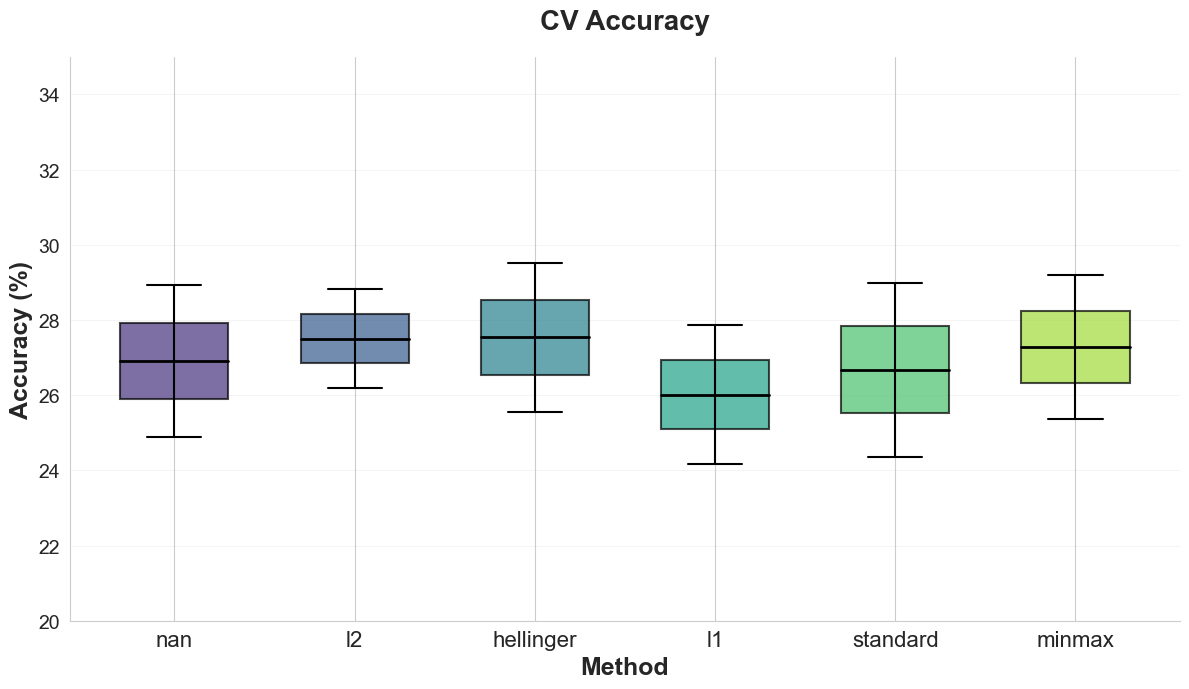

In [79]:
from jordi_utils import box_plot
box_plot(scaling)

In [76]:
classifiers = ["log_reg", "svm_linear", "svm_rbf", "rf"]
experiment_one_acc = {}
experiment_one_data = {}

for clf in classifiers:
    print("Running classifier", clf)
    bovw = BOVW(detector_type="SIFT", codebook_size=128)
    experiment_one_acc[clf], experiment_one_data[clf] = run_BOVW_experiment(bovw,data_train,data_test, clf_name=clf)

clear_output()
print("Experiment 1 succesfull")

Experiment 1 succesfull


In [ ]:
classifier_results = results[results["Experiment"] == "Classifiers"]
classifier_results

,Experiment,Parameter,Value,Classifier,Train_Accuracy,CV_Accuracy,CV_Std,Test_Accuracy
0,Classifiers,Type,log_reg,log_reg,0.363417,0.284545,0.022446,0.303182
1,Classifiers,Type,svm_linear,svm_linear,0.349851,0.271095,0.011908,0.291818
2,Classifiers,Type,svm_rbf,svm_rbf,0.596114,0.301675,0.017618,0.340000
3,Classifiers,Type,rf,rf,1.000000,0.247870,0.013414,0.272727


c:\Users\jordi\Desktop\C3\project-1\Week1\jordi_utils.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Value'] = data['Value'].astype(str)


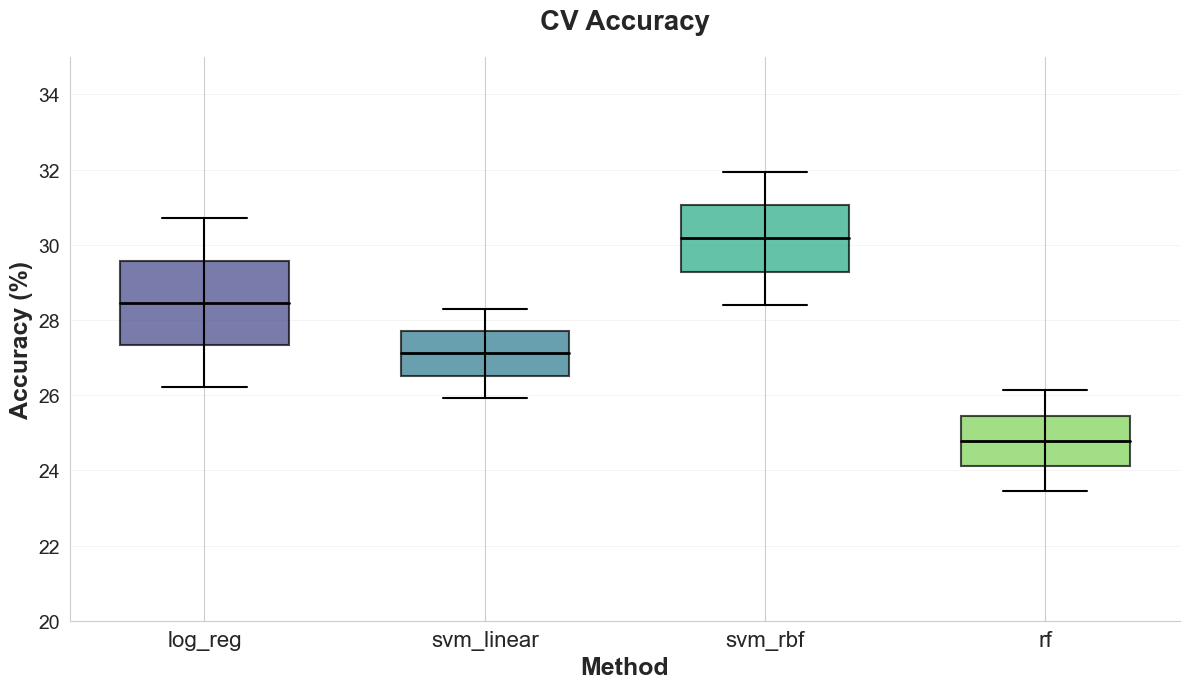

In [ ]:
box_plot(classifier_results)

In [97]:
pyramid_acc = {}
pyramid_data = {}
levels =  [1,2,3,4,5]
for lvl in levels:
        bovw = BOVW(detector_type="DENSE_SIFT", codebook_size=128, pyramid_levels=lvl,detector_kwargs={'step_size': 10, 'scales': [4, 8, 12, 16]})
        pyramid_acc[method], pyramid_data[method] = run_BOVW_experiment(bovw,data_train,data_test,)

scale_configs = [([4], "Small"), ([16], "Large"), ([4, 8, 12, 16], "Multi")]

clear_output()
print("Experiment pyramids succesfull")

Experiment pyramids succesfull


In [95]:
pyramid_results = results[results["Experiment"] == "Spatial Pyramid"]
pyramid_results

,Experiment,Parameter,Value,Classifier,Train_Accuracy,CV_Accuracy,CV_Std,Test_Accuracy
0,Spatial Pyramid,Levels,1,svm_linear,0.363992,0.281900,0.015171,0.304545
1,Spatial Pyramid,Levels,2,svm_linear,0.501610,0.261553,0.008235,0.305909
2,Spatial Pyramid,Levels,3,svm_linear,0.795815,0.204758,0.009196,0.235455
3,Spatial Pyramid,Levels,4,svm_linear,1.000000,0.206255,0.011420,0.220000
4,Spatial Pyramid,Levels,5,svm_linear,1.000000,0.205908,0.009255,0.224545


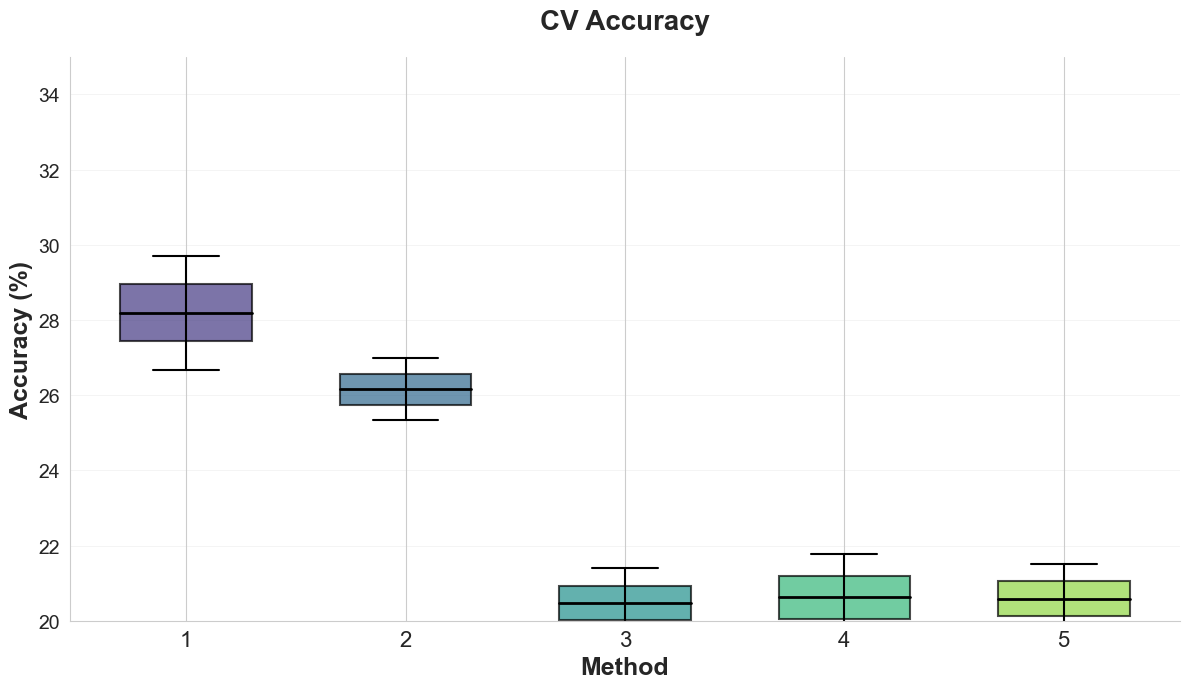

In [99]:
box_plot(pyramid_results)

KeyError: 1

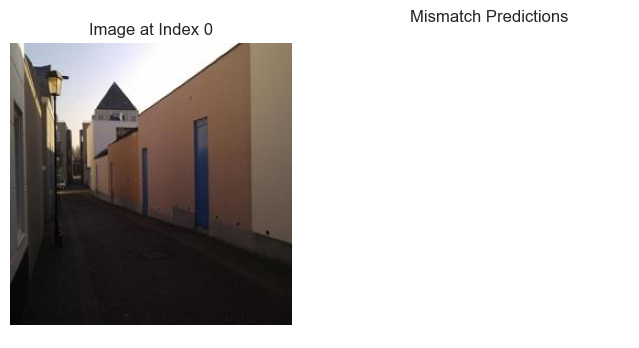

In [100]:
plot_imgs_at_idx(0,data_test,levels,pyramid_data)